# Разработка модели машинного обучения для  принятия решений о покупке бурёнок для молочного хозяйства «Вольный луг»

Фермер, владелец молочного хозяйства «Вольный луг» хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого был заключен контракт с ассоциацией пастбищ «ЭкоФерма». Критерии отбора коров: средний удой за год — не менее 6000 килограммов,
молоко должно быть вкусным.

Цель - создать две прогнозные модели для отбора бурёнок в поголовье:
- первая будет прогнозировать возможный удой коровы (целевой признак Удой);
- вторая рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).

План разработки: 
- Загрузка и предобработка данных
- Исследовательский и корреляционный анализ данных
- Обучение моделей линейной и логистической регрессии

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Загрузка данных

In [4]:
farm_main = pd.read_csv('ferma_main.csv',sep=';')
farm_dad = pd.read_csv('ferma_dad.csv',sep=';')
cow_buy = pd.read_csv('cow_buy.csv',sep=';')

In [5]:
farm_main.head()

id  Удой, кг ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0   1      5863                                  14,2              1743   
1   2      5529                                  12,8              2138   
2   3      5810                                    14              1854   
3   4      5895                                  12,4              2012   
4   5      5302                                  12,8              1675   

  СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
0                                 0,89   Вис Бик Айдиал    Равнинное   
1                                 0,89   Вис Бик Айдиал    Равнинные   
2                                0,885  РефлешнСоверинг    Холмистое   
3                                0,885  РефлешнСоверинг    Холмистое   
4                                0,885   Вис Бик Айдиал    Равнинные   

  порода папы_быка Жирность,% Белок,% Вкус молока      Возраст  
0           Айдиал       3,58   3,076      вкусно  более_2_лет  
1          Соверин       3,54   3,079      вкусно  менее_2_лет  
2          Соверин       3,59   3,074   не вкусно  более_2_лет  
3           Айдиал        3,4   3,075   не вкусно  более_2_лет  
4          Соверин       3,73   3,073      вкусно  менее_2_лет

In [6]:
farm_main.columns = [
    'id',
    'milk_yield_kg',
    'energy_feed_unit',
    'raw_protein_g',
    'sugar_protein_ratio',
    'breed',
    'pasture_type',
    'father_breed',
    'fat_percent',
    'protein_percent',
    'milk_taste',
    'age'
]

In [7]:
farm_dad.head()

id  Имя Папы
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин

In [8]:
farm_dad.columns = [
    'id',
    'father_name'
]

In [9]:
cow_buy.head()

Порода Тип пастбища порода папы_быка  Имя_папы Текущая_жирность,%  \
0   Вис Бик Айдиал    холмистое           Айдиал  Геркулес               3,58   
1   Вис Бик Айдиал    равнинное          Соверин    Буйный               3,54   
2  РефлешнСоверинг    равнинное          Соверин     Барин               3,59   
3  РефлешнСоверинг    холмистое           Айдиал    Буйный                3,4   
4  РефлешнСоверинг    равнинное           Айдиал    Буйный               3,64   

  Текущий_уровень_белок,%      Возраст  
0                   3,076  более_2_лет  
1                   3,081  менее_2_лет  
2                   3,074  более_2_лет  
3                   3,061  более_2_лет  
4                   3,074  более_2_лет

In [10]:
cow_buy.columns = [
    'breed',
    'pasture_type',
    'father_breed',
    'father_name',
    'fat_percent',
    'protein_percent',
    'age'
]

In [11]:
farm_main.head()

id  milk_yield_kg energy_feed_unit  raw_protein_g sugar_protein_ratio  \
0   1           5863             14,2           1743                0,89   
1   2           5529             12,8           2138                0,89   
2   3           5810               14           1854               0,885   
3   4           5895             12,4           2012               0,885   
4   5           5302             12,8           1675               0,885   

             breed pasture_type father_breed fat_percent protein_percent  \
0   Вис Бик Айдиал    Равнинное       Айдиал        3,58           3,076   
1   Вис Бик Айдиал    Равнинные      Соверин        3,54           3,079   
2  РефлешнСоверинг    Холмистое      Соверин        3,59           3,074   
3  РефлешнСоверинг    Холмистое       Айдиал         3,4           3,075   
4   Вис Бик Айдиал    Равнинные      Соверин        3,73           3,073   

  milk_taste          age  
0     вкусно  более_2_лет  
1     вкусно  менее_2_лет  
2  не вкусно  более_2_лет  
3  не вкусно  более_2_лет  
4     вкусно  менее_2_лет

In [12]:
farm_dad.head()

id father_name
0   1      Буйный
1   2    Соловчик
2   3       Барин
3   4      Буйный
4   5       Барин

In [13]:
cow_buy.head()

breed pasture_type father_breed father_name fat_percent  \
0   Вис Бик Айдиал    холмистое       Айдиал    Геркулес        3,58   
1   Вис Бик Айдиал    равнинное      Соверин      Буйный        3,54   
2  РефлешнСоверинг    равнинное      Соверин       Барин        3,59   
3  РефлешнСоверинг    холмистое       Айдиал      Буйный         3,4   
4  РефлешнСоверинг    равнинное       Айдиал      Буйный        3,64   

  protein_percent          age  
0           3,076  более_2_лет  
1           3,081  менее_2_лет  
2           3,074  более_2_лет  
3           3,061  более_2_лет  
4           3,074  более_2_лет

### Вывод 
Стандартизированы названия колонок, данные соответствуют описанию задачи. 

##  Предобработка данных

In [16]:
farm_main.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   634 non-null    int64 
 1   milk_yield_kg        634 non-null    int64 
 2   energy_feed_unit     634 non-null    object
 3   raw_protein_g        634 non-null    int64 
 4   sugar_protein_ratio  634 non-null    object
 5   breed                634 non-null    object
 6   pasture_type         634 non-null    object
 7   father_breed         634 non-null    object
 8   fat_percent          634 non-null    object
 9   protein_percent      634 non-null    object
 10  milk_taste           634 non-null    object
 11  age                  634 non-null    object
dtypes: int64(3), object(9)
memory usage: 59.6+ KB


In [17]:
farm_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           629 non-null    int64 
 1   father_name  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [18]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   breed            20 non-null     object
 1   pasture_type     20 non-null     object
 2   father_breed     20 non-null     object
 3   father_name      20 non-null     object
 4   fat_percent      20 non-null     object
 5   protein_percent  20 non-null     object
 6   age              20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


Во всех таблицах пропусков не обнаружено. 

### Изменение типов данных

In [21]:
cols_type_change = ['energy_feed_unit','sugar_protein_ratio','fat_percent', 'protein_percent']

In [22]:
farm_main[cols_type_change] = \
farm_main[cols_type_change].apply(lambda x: x.str.replace(',','.')).astype('float64') 
#замена , на . для изменения типа данных на float 64

In [23]:
farm_main.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   634 non-null    int64  
 1   milk_yield_kg        634 non-null    int64  
 2   energy_feed_unit     634 non-null    float64
 3   raw_protein_g        634 non-null    int64  
 4   sugar_protein_ratio  634 non-null    float64
 5   breed                634 non-null    object 
 6   pasture_type         634 non-null    object 
 7   father_breed         634 non-null    object 
 8   fat_percent          634 non-null    float64
 9   protein_percent      634 non-null    float64
 10  milk_taste           634 non-null    object 
 11  age                  634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB


In [24]:
cow_buy[['fat_percent','protein_percent']] = \
cow_buy[['fat_percent','protein_percent']].apply(lambda x: x.str.replace(',','.')).astype('float64')
#замена , на . для изменения типа данных на float 64

In [25]:
cow_buy.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   breed            20 non-null     object 
 1   pasture_type     20 non-null     object 
 2   father_breed     20 non-null     object 
 3   father_name      20 non-null     object 
 4   fat_percent      20 non-null     float64
 5   protein_percent  20 non-null     float64
 6   age              20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


### Проверка на дубликаты

Проверка на неявные дубликаты

In [28]:
for name in ['breed','pasture_type','father_breed','milk_taste','age']:
    print(name, farm_main[name].unique())

breed ['Вис Бик Айдиал' 'РефлешнСоверинг']
pasture_type ['Равнинное' 'Равнинные' 'Холмистое']
father_breed ['Айдиал' 'Соверин' 'Айдиалл']
milk_taste ['вкусно' 'не вкусно']
age ['более_2_лет' 'менее_2_лет']


In [29]:
farm_dad['father_name'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

In [30]:
for name in ['breed','pasture_type','father_breed','father_name','age']:
    print(name, cow_buy[name].unique())

breed ['Вис Бик Айдиал' 'РефлешнСоверинг']
pasture_type ['холмистое' 'равнинное']
father_breed ['Айдиал' 'Соверин']
father_name ['Геркулес' 'Буйный' 'Барин' 'Соловчик']
age ['более_2_лет' 'менее_2_лет']


In [31]:
farm_main['pasture_type'] = farm_main['pasture_type'].str.replace('Равнинные','Равнинное')
farm_main['father_breed'] = farm_main['father_breed'].str.replace('Айдиалл','Айдиал')
cow_buy['pasture_type'] = cow_buy['pasture_type'].str.replace('холмистое','Холмистое')
cow_buy['pasture_type'] = cow_buy['pasture_type'].str.replace('равнинное','Равнинное')

Проверка на явные дубликаты

In [33]:
farm_main[farm_main.duplicated(keep=False)] #есть явные дубликаты

id  milk_yield_kg  energy_feed_unit  raw_protein_g  sugar_protein_ratio  \
626  627           5970              14.4           1837                 0.88   
629  627           5970              14.4           1837                 0.88   
630  627           5970              14.4           1837                 0.88   
631  627           5970              14.4           1837                 0.88   
632  627           5970              14.4           1837                 0.88   
633  627           5970              14.4           1837                 0.88   

               breed pasture_type father_breed  fat_percent  protein_percent  \
626  РефлешнСоверинг    Холмистое      Соверин         3.64            3.075   
629  РефлешнСоверинг    Холмистое      Соверин         3.64            3.075   
630  РефлешнСоверинг    Холмистое      Соверин         3.64            3.075   
631  РефлешнСоверинг    Холмистое      Соверин         3.64            3.075   
632  РефлешнСоверинг    Холмистое      Соверин         3.64            3.075   
633  РефлешнСоверинг    Холмистое      Соверин         3.64            3.075   

    milk_taste          age  
626  не вкусно  более_2_лет  
629  не вкусно  более_2_лет  
630  не вкусно  более_2_лет  
631  не вкусно  более_2_лет  
632  не вкусно  более_2_лет  
633  не вкусно  более_2_лет

In [34]:
farm_main = farm_main.drop_duplicates() #удаление дубликатов

In [35]:
farm_dad[farm_dad.duplicated()] #нет дубликатов

Empty DataFrame
Columns: [id, father_name]
Index: []

In [36]:
cow_buy[cow_buy.duplicated(keep=False)] #есть явные дубликаты

breed pasture_type father_breed father_name  fat_percent  \
0    Вис Бик Айдиал    Холмистое       Айдиал    Геркулес         3.58   
2   РефлешнСоверинг    Равнинное      Соверин       Барин         3.59   
4   РефлешнСоверинг    Равнинное       Айдиал      Буйный         3.64   
6    Вис Бик Айдиал    Холмистое       Айдиал    Геркулес         3.58   
8   РефлешнСоверинг    Равнинное      Соверин       Барин         3.59   
14  РефлешнСоверинг    Равнинное      Соверин       Барин         3.59   
19  РефлешнСоверинг    Равнинное       Айдиал      Буйный         3.64   

    protein_percent          age  
0             3.076  более_2_лет  
2             3.074  более_2_лет  
4             3.074  более_2_лет  
6             3.076  более_2_лет  
8             3.074  более_2_лет  
14            3.074  более_2_лет  
19            3.074  более_2_лет

In [37]:
cow_buy = cow_buy.drop_duplicates() #удаление дубликатов

In [38]:
farm_main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   629 non-null    int64  
 1   milk_yield_kg        629 non-null    int64  
 2   energy_feed_unit     629 non-null    float64
 3   raw_protein_g        629 non-null    int64  
 4   sugar_protein_ratio  629 non-null    float64
 5   breed                629 non-null    object 
 6   pasture_type         629 non-null    object 
 7   father_breed         629 non-null    object 
 8   fat_percent          629 non-null    float64
 9   protein_percent      629 non-null    float64
 10  milk_taste           629 non-null    object 
 11  age                  629 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 63.9+ KB


In [39]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 0 to 18
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   breed            16 non-null     object 
 1   pasture_type     16 non-null     object 
 2   father_breed     16 non-null     object 
 3   father_name      16 non-null     object 
 4   fat_percent      16 non-null     float64
 5   protein_percent  16 non-null     float64
 6   age              16 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.0+ KB


### Вывод
Изначально было получено 3 датасета, farm_main (634 x 12), cow_buy (20 x 7), farm_dad (629 x 2). В ходе предобработки данных: 
- Изменены типы данных в таблицах farm_main, cow_buy. Тип object изменен на float64 в соответствующих колонках;
- В таблицах farm_main и cow_buy удалено 5 и 4 строк дубликат соотвественно;
- В таблицах farm_main и cow_buy стандартизированы названия категорий pasture_type и father_breed;
- Пропусков обнаружено не было.

## Исследовательский анализ данных

Задача: Провести статистический анализ всех признаков, постройть график для каждого признака, найти аномалии и выбросы. 


### Построение графиков для количественных признаков датасета farm_main

In [43]:
farm_main.describe()

id  milk_yield_kg  energy_feed_unit  raw_protein_g  \
count  629.00000     629.000000        629.000000     629.000000   
mean   315.00000    6188.750397         14.543879    1923.364070   
std    181.72094    1644.795489          1.306408     182.956251   
min      1.00000    5204.000000         10.900000    1660.000000   
25%    158.00000    5751.000000         13.500000    1771.000000   
50%    315.00000    6133.000000         14.700000    1888.000000   
75%    472.00000    6501.000000         15.600000    2062.000000   
max    629.00000   45616.000000         16.800000    2349.000000   

       sugar_protein_ratio  fat_percent  protein_percent  
count           629.000000   629.000000       629.000000  
mean              0.913116     3.603657         3.075671  
std               0.032203     0.168656         0.002549  
min               0.840000     2.990000         3.069000  
25%               0.890000     3.590000         3.074000  
50%               0.930000     3.650000         3.076000  
75%               0.940000     3.720000         3.077000  
max               0.960000     3.750000         3.085000

In [44]:
farm_main['milk_yield_kg'].plot(kind='hist',bins=50);
plt.title("Гистограмма для признака удой")
plt.ylabel('Частота');
plt.xlabel('Удой, кг');

Есть выбросы, более удой более 45 тысяч. Решено удалить строки с аномальными значениями.

In [46]:
farm_main = farm_main[farm_main['milk_yield_kg']<40000]

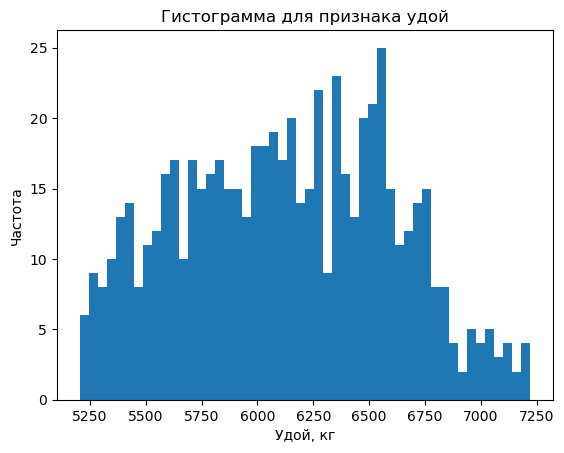

In [47]:
farm_main['milk_yield_kg'].plot(kind='hist',bins=50);
plt.title("Гистограмма для признака удой")
plt.ylabel('Частота');
plt.xlabel('Удой, кг');

Распределение близко к нормальному, асимметрично влево, без выраженного пика.

In [49]:
farm_main['energy_feed_unit'].plot(kind='hist');
plt.ylabel('Частота');
plt.title("Гистограмма для признака ЭКЕ")
plt.xlabel('ЭКЕ (Энергетическая кормовая единица)');

Распределение близко к нормальному, асимметрично вправо, выбросов нет.

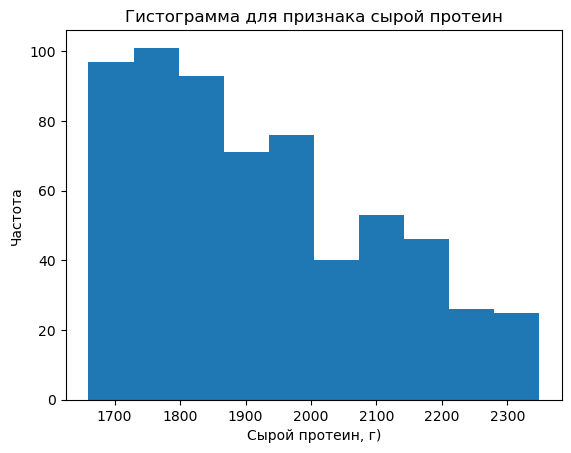

In [51]:
farm_main['raw_protein_g'].plot(kind='hist');
plt.ylabel('Частота');
plt.title("Гистограмма для признака сырой протеин")
plt.xlabel('Сырой протеин, г)');

Распределение сырых протеинов у коров скошено вправо, выбросов нет. 

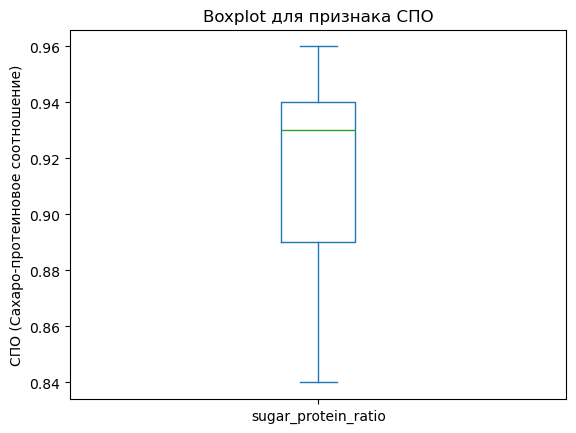

In [53]:
farm_main['sugar_protein_ratio'].plot(kind='box');
plt.title("Boxplot для признака СПО")
plt.ylabel('СПО (Сахаро-протеиновое соотношение)');

Выбросов нет, медианное значение около 0.93

In [55]:
farm_main['protein_percent'].plot(kind='box');
plt.title("Boxplot для признака Протеин, %")
plt.ylabel('Протеин, %');

Есть несколько выбросов, но их мало и они не критичны, решено оставить.

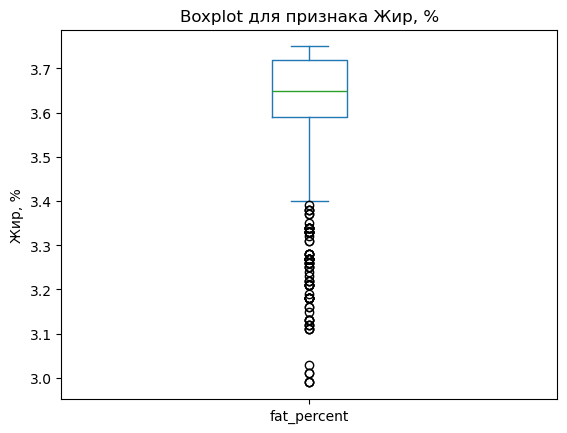

In [57]:
farm_main['fat_percent'].plot(kind='box');
plt.title("Boxplot для признака Жир, %")
plt.ylabel('Жир, %');

Есть аномальные значения менее 3.4%, однако их довольно много. Учитывая, что показатель выражен в процентах и его значения остаются в разумных пределах (в районе 3.0%–3.5%), эти значения не кажутся ошибочными. Поэтому принято решение не удалять их из анализа.

### Построение графиков для количественных признаков датасета cow_buy

In [60]:
cow_buy.describe()

fat_percent  protein_percent
count    16.000000        16.000000
mean      3.571875         3.068250
std       0.141620         0.011264
min       3.340000         3.046000
25%       3.415000         3.059500
50%       3.585000         3.073500
75%       3.692500         3.076750
max       3.770000         3.081000

In [61]:
cow_buy['fat_percent'].plot(kind='box');
plt.title("Boxplot для признака Жир, %")
plt.ylabel('Жир, %');

In [62]:
cow_buy['protein_percent'].plot(kind='box');
plt.title("Boxplot для признака Протеин, %")
plt.ylabel('Протеин, %');

В количественных признаках датасета cow_buy аномалий нет.

### Построение графиков для категориальных признаков

In [65]:
farm_main.head()

id  milk_yield_kg  energy_feed_unit  raw_protein_g  sugar_protein_ratio  \
0   1           5863              14.2           1743                0.890   
1   2           5529              12.8           2138                0.890   
2   3           5810              14.0           1854                0.885   
3   4           5895              12.4           2012                0.885   
4   5           5302              12.8           1675                0.885   

             breed pasture_type father_breed  fat_percent  protein_percent  \
0   Вис Бик Айдиал    Равнинное       Айдиал         3.58            3.076   
1   Вис Бик Айдиал    Равнинное      Соверин         3.54            3.079   
2  РефлешнСоверинг    Холмистое      Соверин         3.59            3.074   
3  РефлешнСоверинг    Холмистое       Айдиал         3.40            3.075   
4   Вис Бик Айдиал    Равнинное      Соверин         3.73            3.073   

  milk_taste          age  
0     вкусно  более_2_лет  
1     вкусно  менее_2_лет  
2  не вкусно  более_2_лет  
3  не вкусно  более_2_лет  
4     вкусно  менее_2_лет

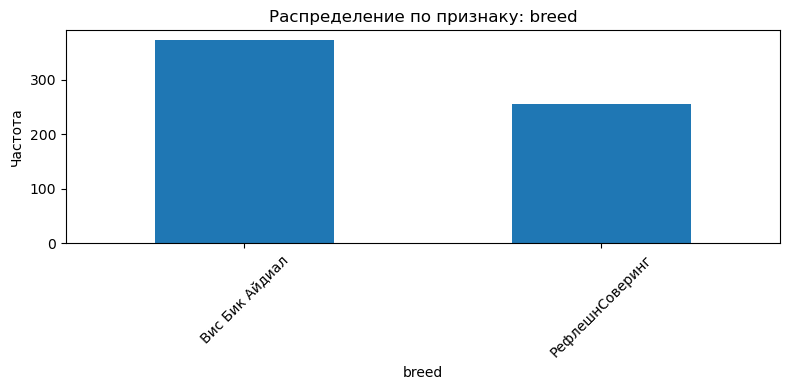

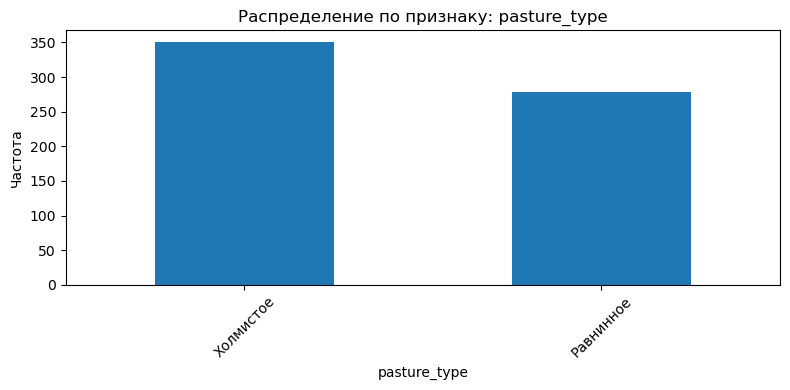

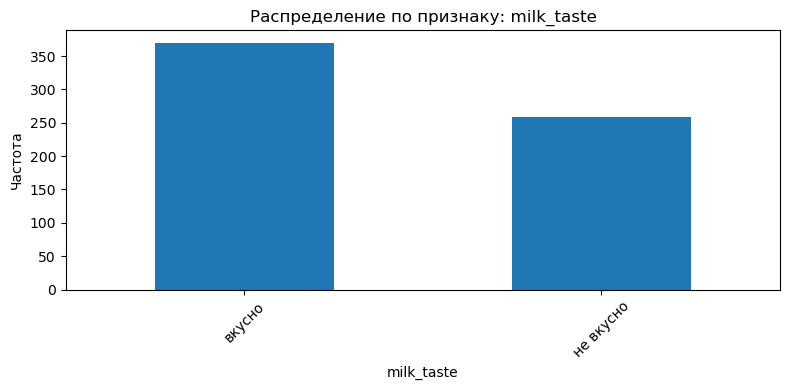

In [66]:
# Выбираем категориальные признаки
cat_farm_columns = farm_main.select_dtypes(include='object').columns

# Строим bar plot для каждого
for col in cat_farm_columns:
    plt.figure(figsize=(8, 4))
    farm_main[col].value_counts().plot(kind='bar')
    plt.title(f'Распределение по признаку: {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Наблюдается равномерное распределение по большинству категориальных признаков., только по признаку age, "менее 2 лет" почти на 400 меньше, чем "более 2 лет"

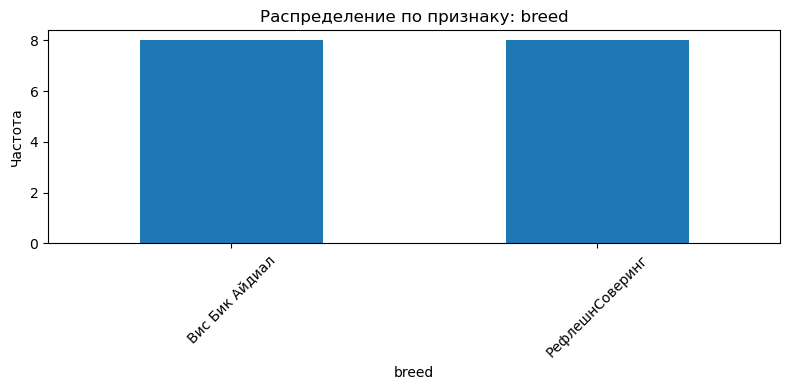

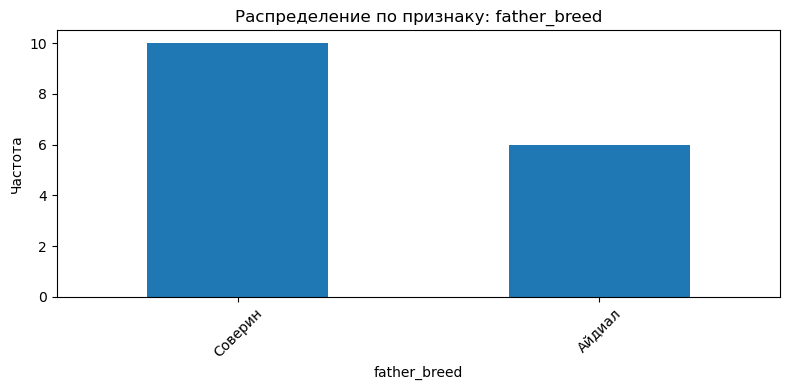

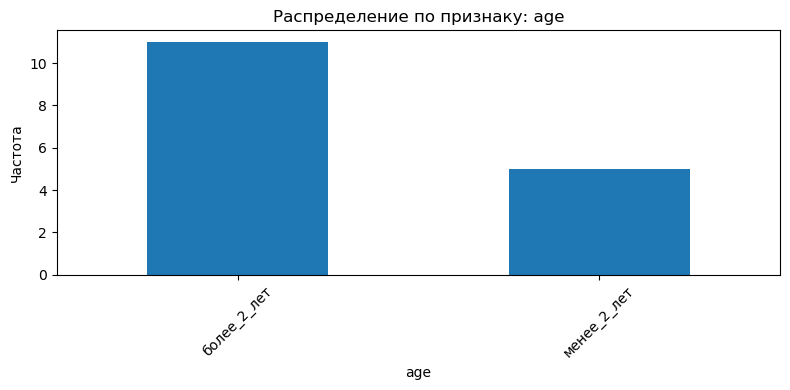

In [68]:
# Выбираем категориальные признаки
cat_buy_columns = cow_buy.select_dtypes(include='object').columns

# Строим bar plot для каждого
for col in cat_buy_columns:
    plt.figure(figsize=(8, 4))
    cow_buy[col].value_counts().plot(kind='bar')
    plt.title(f'Распределение по признаку: {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

- Равномерное распределение в признаках breed, pasture_type. 
- father_breed Соверин немного больше, чем Айдиал
- father_name Буйный больше всего
- "менее 2 лет" меньше, чем "более 2 лет"

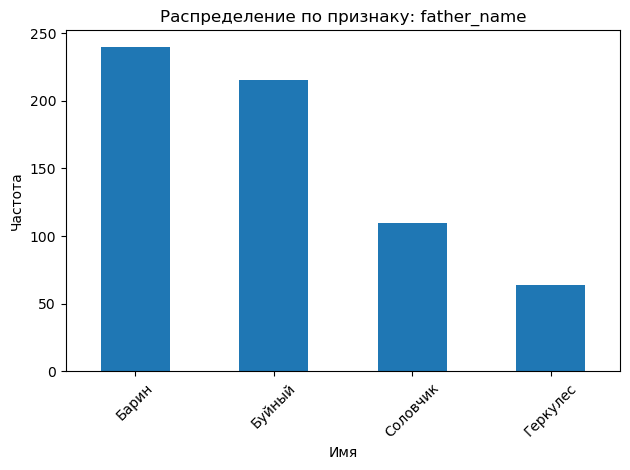

In [70]:
farm_dad['father_name'].value_counts().plot(kind='bar');
plt.title(f'Распределение по признаку: father_name')
plt.xlabel('Имя')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

около 200 имен Барин и Буйный. Менее 150 имен Соловчик и Геркулес

### Вывод
В ходе исследовательского анализа данных: 
 - В таблице farm_main
     - Были найдены и удалены аномалии в признаке milk_yield_kg.
     - В fat_percent и protein_percent так же были обнаружены выбросы, но они были оставлены, в связи с тем, что признак выражен в процентах.
     - Коров менее 2 лет мало в таблице, менее 150.
 - В таблице cow_buy
     - аномалий не найдено
     - значения "менее 2 лет" меньше, чем "более 2 лет"
 - В таблице farm_dad
     - около 200 имен Барин и Буйный, менее 150 имен Соловчик и Геркулес

## Корреляционный анализ
Задача: Провести корреляционный анализ признаков в датасете farm_main, найти взаимосвязи, построить диаграммы рассеяния. 

### Матрица корреляции

In [109]:
numerical_farm_cols = farm_main.drop(columns=['id','milk_yield_kg']).select_dtypes(include='number').columns

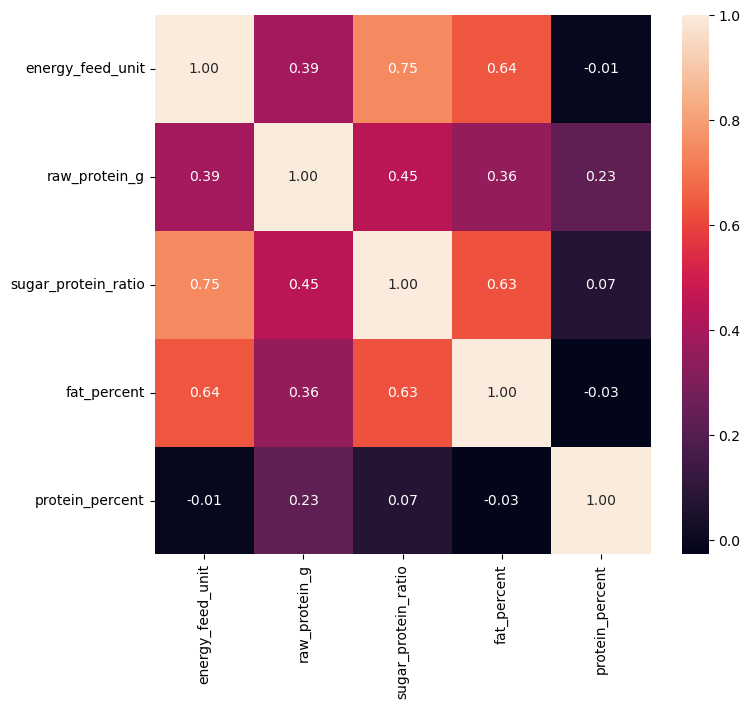

In [115]:
plt.figure(figsize=(8,7))

sns.heatmap(farm_main[numerical_farm_cols].corr(), annot=True, fmt='.2f');

Между целевым признаком milk_yield_kg и energy_feed_unit, sugar_protein_ratio наблюдается высокая корреляция. Средняя с fat_percent и слабая с raw_protein_g, с protein_percent корреляции почти нет. 

Между двумя входными признаками, которые сильнее всех коррелируют с целевой переменной, наблюдается высокая взаимная корреляция. Это указывает на наличие мультиколлинеарности между признаками.

###  Построение диаграмм рассеяния

#### Диаграммы рассеяния зависимости количественных признаков от целевой переменной

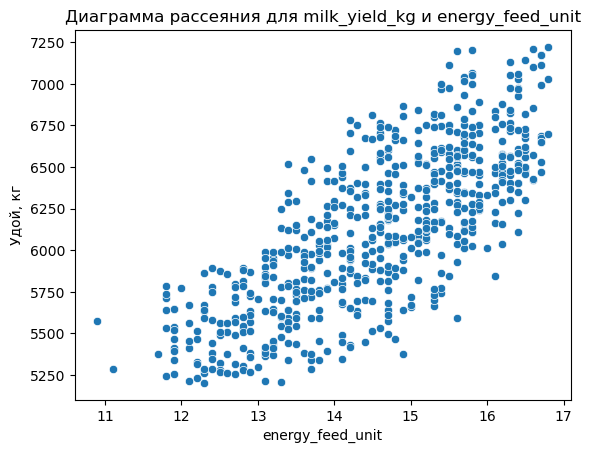

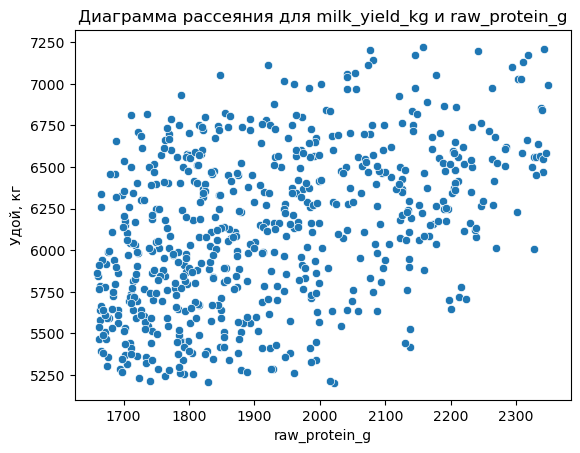

In [120]:
for num_col in numerical_farm_cols:
        sns.scatterplot(data=farm_main, x=num_col, y='milk_yield_kg')
        plt.title(f'Диаграмма рассеяния для milk_yield_kg и {num_col}')
        plt.xlabel(num_col)
        plt.ylabel('Удой, кг')
        plt.show()

- между целевым признаком milk_yield_kg и energy_feed_unit, sugar_protein_ratio есть нелинейные зависимости. у Energy_feed_unit распределение более равномерное без выраженных скоплений.
- с признаком fat_percent линейной зависимости нет, но заметно, что с процентом жира 3.7% удой гораздо больше. 
- с raw_protein_g так же, линейной зависимости не выделено, но после 2100 грамм, количество удоя возрастает. 

In [123]:
# функция для построения диаграммы рассения для зависимости кол. признака от цел. переменной в зависимости от кат. признака
def build_cat_scatter(col):
    for cat_col in cat_farm_columns.drop('milk_taste'):
        sns.scatterplot(data=farm_main, x=col, y='milk_yield_kg',hue=cat_col)
        plt.title(f'Диаграмма рассеяния для milk_yield_kg и {col}')
        plt.xlabel(col)
        plt.ylabel('Удой, кг')
        plt.show()

#### Связь удоя и кормовой единицы по категориям

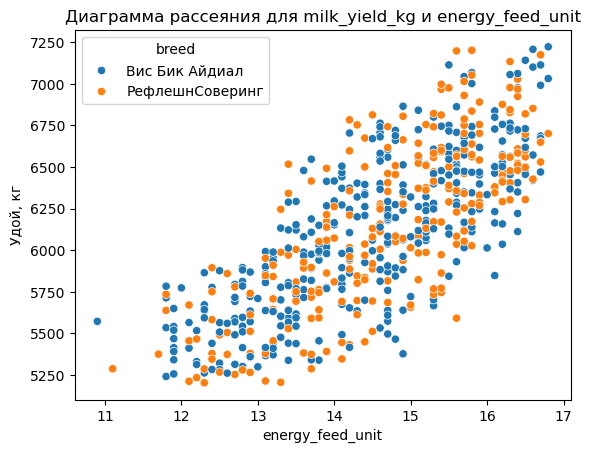

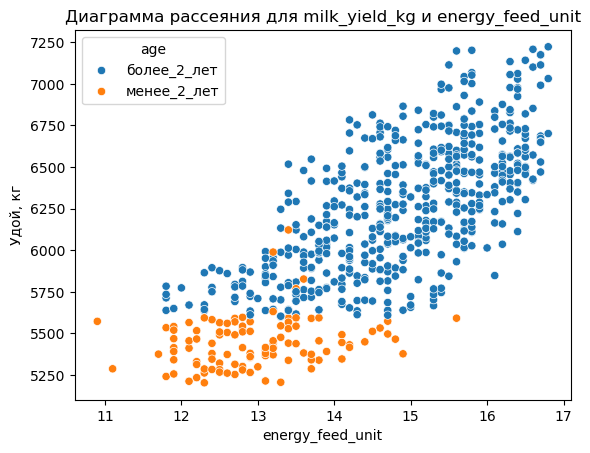

In [126]:
build_cat_scatter('energy_feed_unit')

#### Связь удоя и количества сырого протеина по категориям

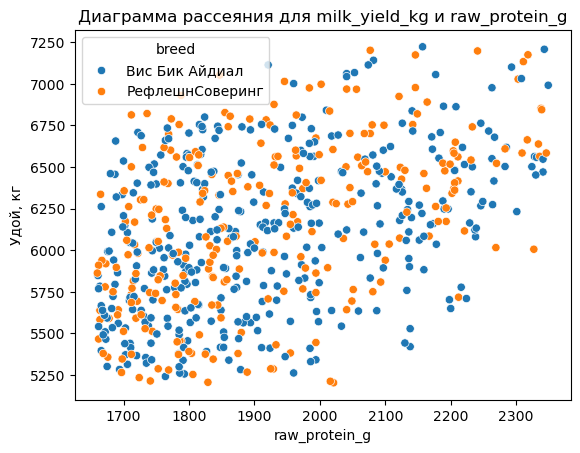

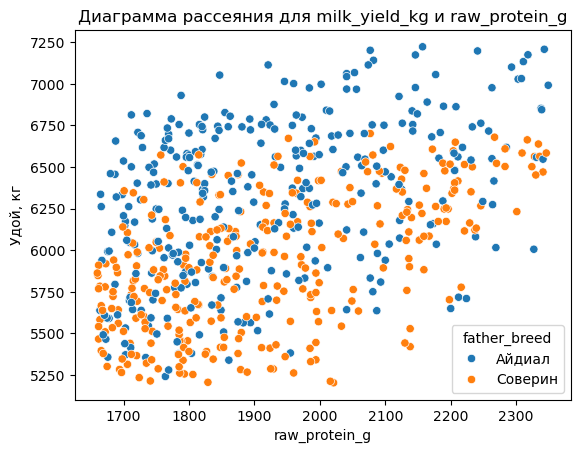

In [129]:
build_cat_scatter('raw_protein_g')

#### Связь удоя и сахаро-протеинового соотношения по категориям

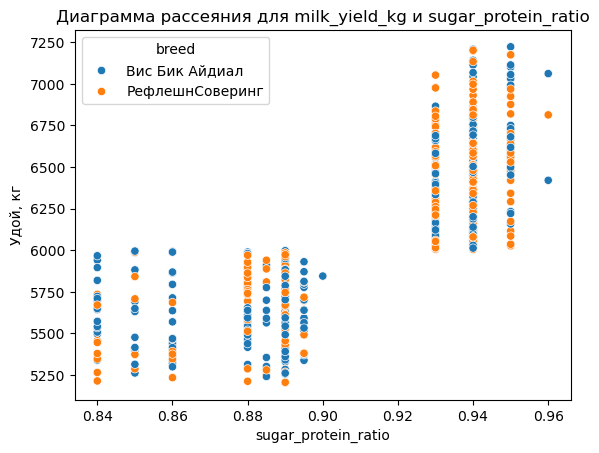

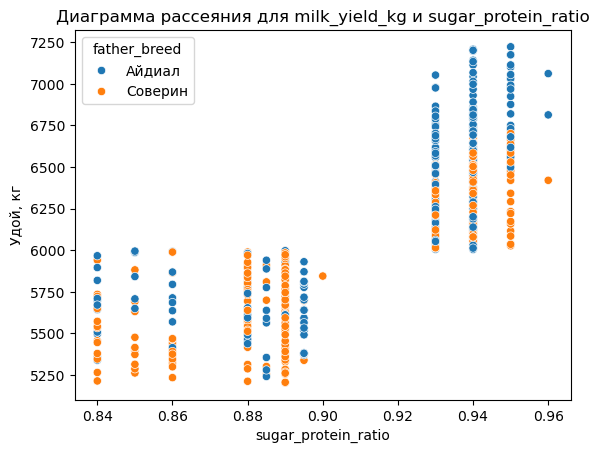

In [131]:
build_cat_scatter('sugar_protein_ratio')

#### Связь удоя и процента жира по категориям

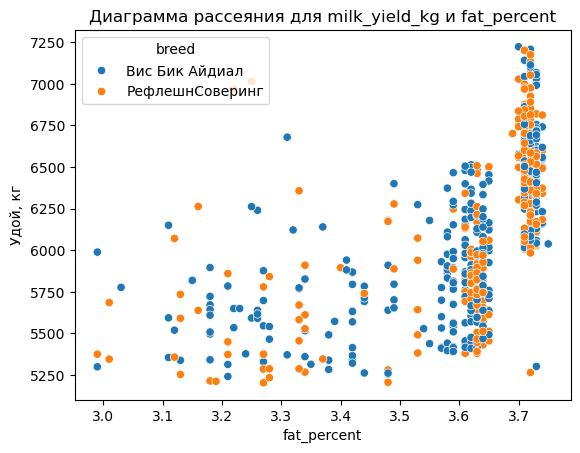

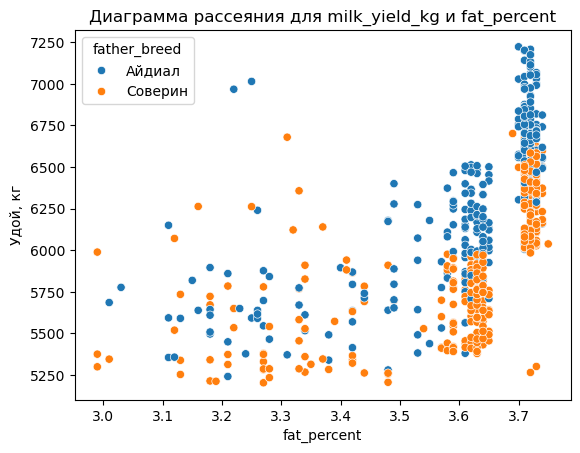

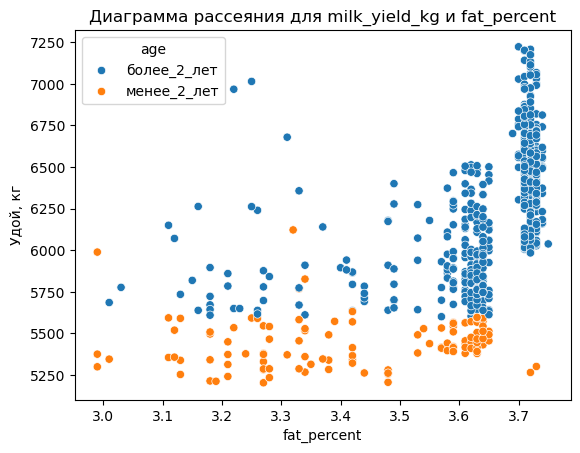

In [134]:
build_cat_scatter('fat_percent')

#### Связь удоя и процента белка по категориям

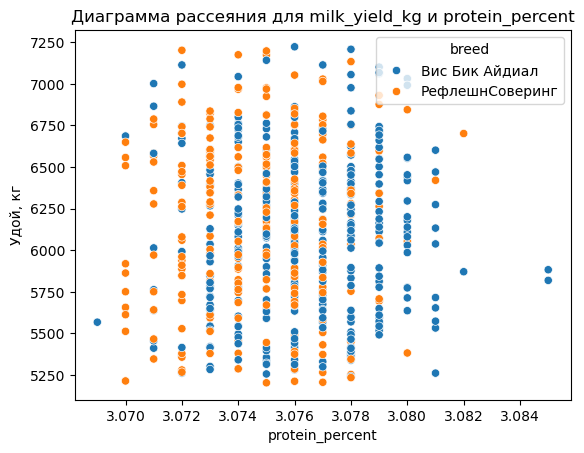

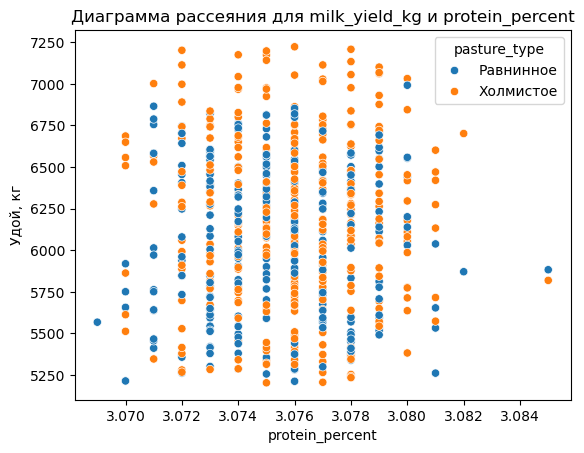

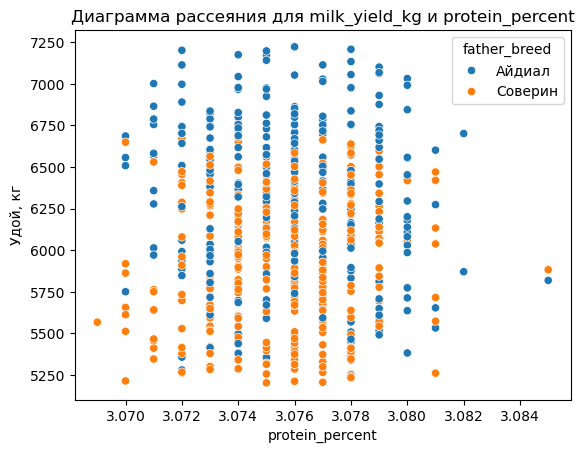

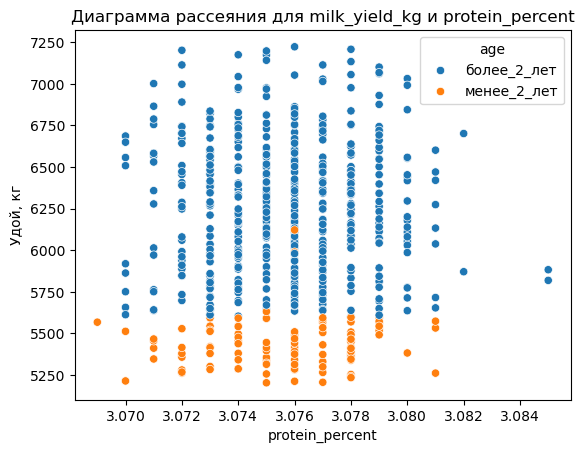

In [136]:
build_cat_scatter('protein_percent')

Была исследована зависимость удоя по всем количественным признакам в зависимости от категориальных данных. Во всех графиках были выражены две зависимости между категориальным и целевым признаками.

- между признаком father_breed и целевым есть зависимость, удоя больше у породы Айдиал. 
- очень заметная зависимость между признаком age и целевым, удоя больше у коров старше 2 лет.

Так же есть зависимости между категориальными признаками и породой кров:
 - РефлешнСоверинг имеет большее СПО (>0.92)
 - РефлешнСоверинг имеет больший процент жира(>3.6)
 - Айдиал имеет больший процент белка(>3.078)
 
Между остальными количественными и категориальными переменны зависимости не выявлены.

### Вывод
В ходе корреляционного анализа:
- между целевым признаком milk_yield_kg и energy_feed_unit, sugar_protein_ratio наблюдается высокая корреляция и нелинейные связи.
- у графика sugar_protein_ratio наблюдения сгруппированы в два кластера, у графика energy_feed_unit распределение более равномерное без выраженных скоплений.
- средняя зависимость с fat_percent и слабая с raw_protein_g, с protein_percent корреляции почти нет.
- между двумя входными признаками, которые сильнее всех коррелируют с целевой переменной, наблюдается высокая взаимная корреляция. Это указывает на наличие мультиколлинеарности между признаками.
- между признаком father_breed и целевым есть зависимость, удоя больше у породы Айдиал.
- очень заметная зависимость между признаком age и целевым, удоя больше у коров старше 2 лет.
- РефлешнСоверинг имеет большее СПО (>0.92)
- РефлешнСоверинг имеет больший процент жира(>3.6)
- Айдиал имеет больший процент белка(>3.078)
- из-за нелинейных зависимостей могут понадобится ввод дополнительныз признаков.

## Обучение модели линейной регрессии
Задача: Обучить модель линейной регресси для предсказания Удоя для датасета cow_buy

### Функции для модели МО

In [172]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression

#функция для подготовки данных для модели МО
def data_preprocess(X,y,num_col_names,cat_col_names):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    
    X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
    X_test_ohe = encoder.transform(X_test[cat_col_names])
    
    encoder_col_names = encoder.get_feature_names_out()
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[num_col_names])
    X_test_scaled = scaler.transform(X_test[num_col_names])
    
    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
    
    return X_train, X_test, y_train, y_test, scaler, encoder 

In [174]:
#функция для создания графиков для анализа остатков
def create_residuals(y_test,predictions):
    residuals = y_test - predictions
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    axes[0].hist(residuals,bins=20,edgecolor='black')
    axes[0].set_title('Гистограмма распределения остатков')
    axes[0].set_xlabel('Остатки')

    axes[1].scatter(x=predictions,y=residuals)
    axes[1].set_xlabel('Предсказания модели')
    axes[1].set_ylabel('Остатки')
    axes[1].set_title('Анализ дисперсии')
    plt.show()

In [176]:
#функция для расчета метрик линейной регрессии
from sklearn.metrics import mean_absolute_error, mean_squared_error
def calculate_metrics_lin(y_test,predictions,num):
    mse = mean_squared_error(y_test,predictions)
    mae = mean_absolute_error(y_test,predictions)
    rmse = mse**(1/2)
    print(f"Метрики для {num} модели линейной регрессии:")
    print(f'MSE = {mse}')
    print(f'MAE = {mae}')
    print(f'RMSE = {rmse}')

In [178]:
#функция для расчета метрик логистической регрессии
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
def calculate_metrics_log(y_test,predictions,threshold):
    accuracy = accuracy_score(y_test,predictions)
    recall = recall_score(y_test,predictions)
    precision = precision_score(y_test,predictions)
    print(f"Метрики для модели логистической регрессии с порогом {threshold}:")
    print(f'accuracy = {accuracy}')
    print(f'recall = {recall}')
    print(f'precision = {precision} \n')

### Модель 1 
Для первой модели для входных данных будут взяты: 
 - Имеющий наибольшую корреляцию, sugar_protein_ratio, energy_feed_unit не будет использован для исбежания проблемы мультиколлинеарности.
 - Имеющие среднюю и слабую зависиости fat_percent и raw_protein_g
 - Категориальные признаки имеющие наибольшую зависимость: age, father_breed

In [181]:
X1 = farm_main[['fat_percent','father_breed','age','raw_protein_g','sugar_protein_ratio']]
y1 = farm_main['milk_yield_kg']
num_col_names1 = ['fat_percent','sugar_protein_ratio','raw_protein_g']
cat_col_names1 = ['father_breed','age']

In [183]:
X_train1, X_test1, y_train1, y_test1, scaler1, encoder1  = data_preprocess(X1,y1,num_col_names1,cat_col_names1)

In [185]:
model_lr1 = LinearRegression()
model_lr1.fit(X_train1, y_train1)   

LinearRegression()

In [187]:
predictions1 = model_lr1.predict(X_test1)

In [189]:
from sklearn.metrics import r2_score
r2_score(y_test1,predictions1)

0.7408560948018587

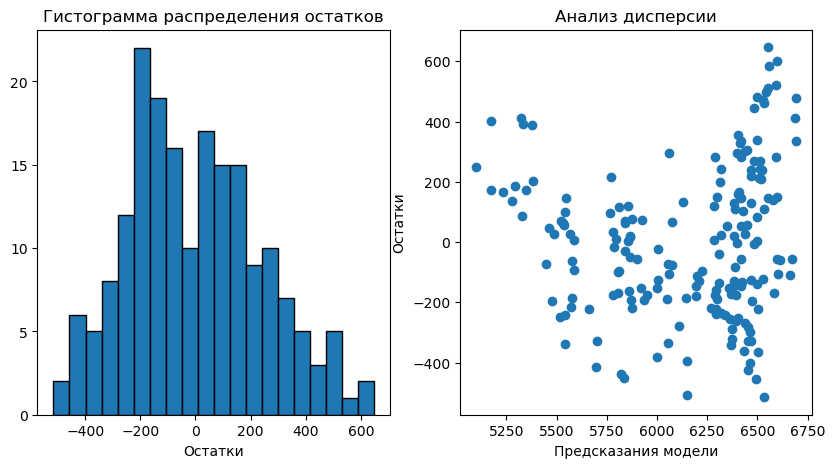

In [191]:
create_residuals(y_test1,predictions1)

- Модель была оценена метрикой R^2, она равна 0.74. 
- Гистограмма распредлеления остатков имеет бимодальное распределение, что указывает на плохое качество модели. 
- Анализ дисперсии показал, что при большем значении предсказаний, появляются большие остатки.

Модель нуждается в усовершенствовании

### Модель 2 
Для второй модели будет исключена нелинейность из признаков sugar_protein_ratio и energy_feed_unit, чтобы эти признаки были информативны для линейной регрессии. Остальные входные данные будут оставлены.

In [195]:
farm_main['energy_feed_unit_sqr'] = farm_main['energy_feed_unit']**2
#Возводим в квадрат  energy_feed_unit для избавления от нелинейной связи с целевым признаком

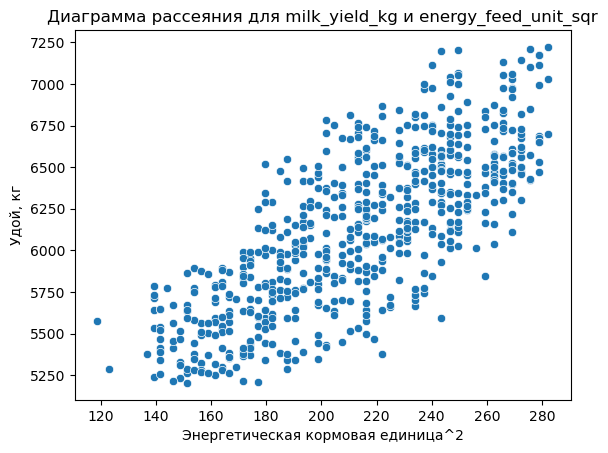

In [197]:
sns.scatterplot(data=farm_main,x='energy_feed_unit_sqr',y='milk_yield_kg');
plt.title(f'Диаграмма рассеяния для milk_yield_kg и energy_feed_unit_sqr');
plt.xlabel('Энергетическая кормовая единица^2');
plt.ylabel('Удой, кг');

С помощью возведения в квадрат связь стала линейной.

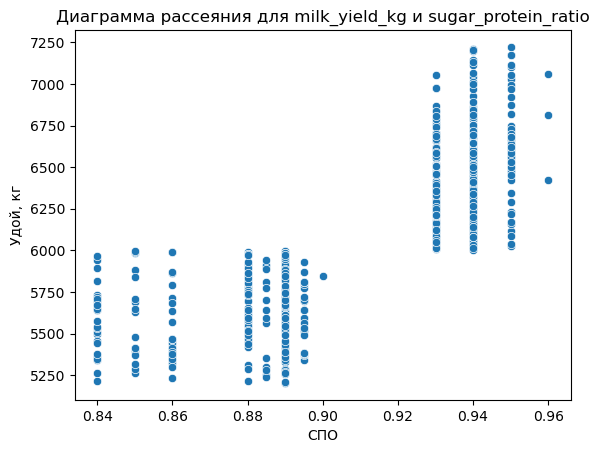

In [200]:
sns.scatterplot(data=farm_main,x='sugar_protein_ratio',y='milk_yield_kg');
plt.title(f'Диаграмма рассеяния для milk_yield_kg и sugar_protein_ratio');
plt.xlabel('СПО');
plt.ylabel('Удой, кг');

По диаграмме рассеяния заметны два кластера, возьмем границу 0.92 для создания категориального бинарного признака.

In [203]:
threshold = 0.92

In [205]:
farm_main['spr_is'] = farm_main['sugar_protein_ratio'].apply(lambda x: "high" if x>threshold else 'low')

In [207]:
X2 = farm_main[['fat_percent','father_breed','age','raw_protein_g','spr_is','energy_feed_unit_sqr']]
y2 = farm_main['milk_yield_kg']
num_col_names2 = ['fat_percent','raw_protein_g','energy_feed_unit_sqr']
cat_col_names2 = ['father_breed','age','spr_is']

In [209]:
X_train2, X_test2, y_train2, y_test2, scaler2, encoder2  = data_preprocess(X2,y2,num_col_names2,cat_col_names2)

In [211]:
model_lr2 = LinearRegression()
model_lr2.fit(X_train2, y_train2)

LinearRegression()

In [213]:
predictions2 = model_lr2.predict(X_test2)

In [239]:
r2_score(y_test2, predictions2)

0.8074750453894356

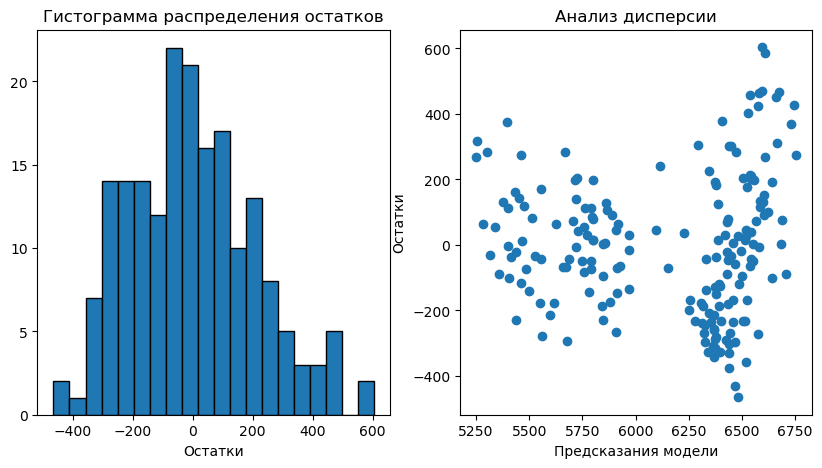

In [241]:
create_residuals(y_test2,predictions2)

- Модель была оценена метрикой R^2, она равна 0.81, улучшение по сравнению с 1 моделью. 
- Гистограмма распредлеления остатков имеет асимметричное нормальное распределение со смещением влево, что говорит о перепрогнозировании, прогнозы больше, чем реальные значения.
- Анализ дисперсии показывает, что при большем значении предсказаний появляются большие остатки.

Несмотря на улучшение R^2, анализ остатков показывают что модель не идеальна.

### Модель 3

Для 3 модели оставим входные данные из модели 2, добавим признак father_name из таблицы farm_dad

In [246]:
farm_main = farm_main.merge(farm_dad,how='inner')

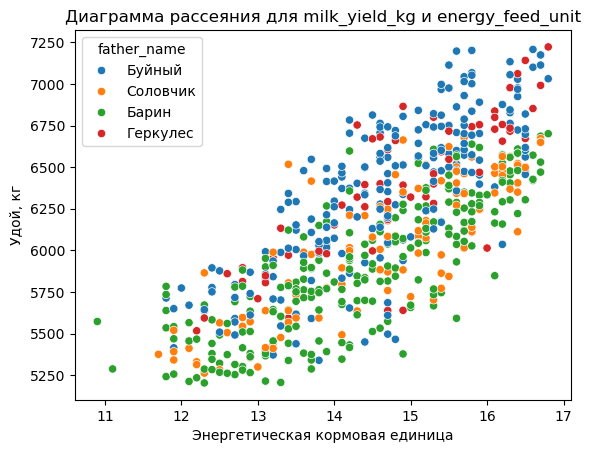

In [248]:
sns.scatterplot(data=farm_main, x='energy_feed_unit', y='milk_yield_kg',hue='father_name')
plt.title(f'Диаграмма рассеяния для milk_yield_kg и energy_feed_unit')
plt.xlabel('Энергетическая кормовая единица')
plt.ylabel('Удой, кг')
plt.show()

По диаграмме заметно, что связь между father_name и целевой переменной есть

In [251]:
X3 = farm_main[['fat_percent','father_breed','age','raw_protein_g','spr_is','energy_feed_unit_sqr','father_name']]
y3 = farm_main['milk_yield_kg']
num_col_names3 = ['fat_percent','raw_protein_g','energy_feed_unit_sqr']
cat_col_names3 = ['father_breed','age','spr_is','father_name']

In [253]:
X_train3, X_test3, y_train3, y_test3, scaler3, encoder3  = data_preprocess(X3,y3,num_col_names3,cat_col_names3)

In [255]:
model_lr3 = LinearRegression()
model_lr3.fit(X_train3, y_train3)

LinearRegression()

In [257]:
predictions3 = model_lr3.predict(X_test3)

In [259]:
r2_score(y_test3, predictions3)

0.8275898699224811

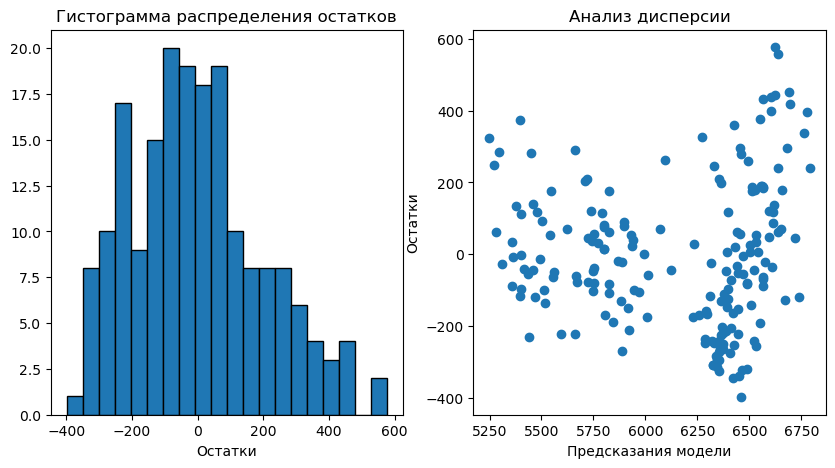

In [261]:
create_residuals(y_test3,predictions3)

- Модель была оценена метрикой R^2, она равна 0.83, улучшение по сравнению с 2 моделью.
- Гистограмма распредлеления остатков имеет асимметричное нормальное распределение со смещением влево, что говорит о перепрогнозировании, прогнозы больше, чем реальные значения.
- Анализ дисперсии показывает, что при большем значении предсказаний появляются большие остатки.

Добавление нового признако улучшило метрику R^2, но анализ остатков остался почти неизменным.

### Сравнение метрик моделей

In [265]:
calculate_metrics_lin(y_test1,predictions1,1)

Метрики для 1 модели линейной регрессии:
MSE = 60536.1389306789
MAE = 202.43928402478804
RMSE = 246.04092938102573


In [267]:
calculate_metrics_lin(y_test2,predictions2,2)

Метрики для 2 модели линейной регрессии:
MSE = 44973.92053660912
MAE = 169.50939688941966
RMSE = 212.07055556255122


In [269]:
calculate_metrics_lin(y_test3,predictions3,3)

Метрики для 3 модели линейной регрессии:
MSE = 40275.088003512734
MAE = 161.26423578764812
RMSE = 200.686541660154


По метрикам лучше всего показывает себя 3 модель. Она будет использована для предсказаний.

### Расчет доверительного интервала

In [273]:
#ошибки модели на тренировочных данных 
y_train_pred1 = model_lr1.predict(X_train1)
residuals = y_train1 - y_train_pred1

In [275]:
#квантили ошибки модели на тренировочных данных, берём 2.5% и 97.5% квантили
q_low = residuals.quantile(0.025)
q_high = residuals.quantile(0.975)

In [277]:
q_low

-386.20766487166776

In [279]:
q_high

487.4955045888322

In [281]:
#прогноз и доверительный интервал
ci_lower = predictions1 + q_low
ci_upper = predictions1 + q_high

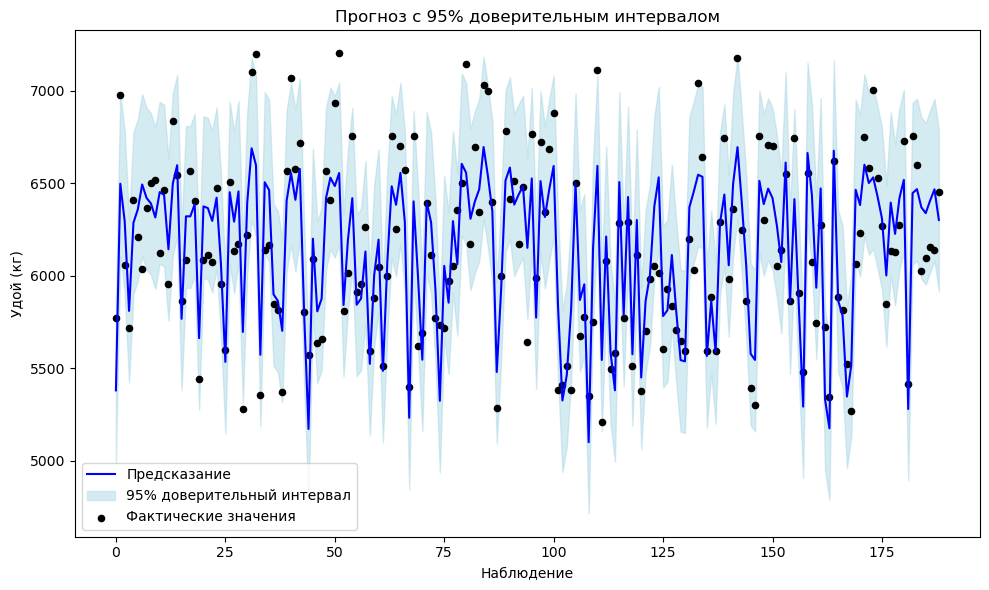

In [283]:
plt.figure(figsize=(10, 6))
x_axis = np.arange(len(predictions1))

plt.plot(x_axis, predictions1, label='Предсказание', color='blue')
plt.fill_between(x_axis, ci_lower, ci_upper, color='lightblue', alpha=0.5, label='95% доверительный интервал')
plt.scatter(x_axis, y_test1, color='black', s=20, label='Фактические значения')

plt.title('Прогноз с 95% доверительным интервалом')
plt.xlabel('Наблюдение')
plt.ylabel('Удой (кг)')
plt.legend()
plt.tight_layout()
plt.show()

Видно, что большая часть фактических значений попадает внутрь доверительного интервала, что говорит о достаточной надёжности модели. Однако наблюдаются отдельные случаи выхода за пределы интервала. 

### Прогнозирование

Для прогнозирования нужно добавить в таблицу cow_buy недостающие признаки: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение). Из информации заказчика они равны увелеченным средним значениям на 5% каждого из соответсвующих признаков из датасета farm_main.

In [288]:
farm_main.describe()

id  milk_yield_kg  energy_feed_unit  raw_protein_g  \
count  628.000000     628.000000        628.000000     628.000000   
mean   315.474522    6125.968153         14.548726    1923.759554   
std    181.475367     475.857053          1.301777     182.832816   
min      1.000000    5204.000000         10.900000    1660.000000   
25%    158.750000    5749.750000         13.500000    1771.750000   
50%    315.500000    6132.500000         14.700000    1888.000000   
75%    472.250000    6501.000000         15.600000    2062.250000   
max    629.000000    7222.000000         16.800000    2349.000000   

       sugar_protein_ratio  fat_percent  protein_percent  energy_feed_unit_sqr  
count           628.000000   628.000000       628.000000            628.000000  
mean              0.913089     3.604268         3.075670            213.357357  
std               0.032221     0.168093         0.002551             37.421299  
min               0.840000     2.990000         3.069000            118.810000  
25%               0.890000     3.590000         3.074000            182.250000  
50%               0.930000     3.650000         3.076000            216.090000  
75%               0.940000     3.720000         3.077000            243.360000  
max               0.960000     3.750000         3.085000            282.240000

In [290]:
cow_buy['energy_feed_unit'] = farm_main['energy_feed_unit'].mean()*1.05

In [292]:
cow_buy['raw_protein_g'] = farm_main['raw_protein_g'].mean()*1.05

In [294]:
cow_buy['sugar_protein_ratio'] = farm_main['sugar_protein_ratio'].mean()*1.05

In [296]:
cow_buy['energy_feed_unit_sqr'] = cow_buy['energy_feed_unit']**2

In [298]:
cow_buy['spr_is'] = cow_buy['sugar_protein_ratio'].apply(lambda x: "high" if x>threshold else 'low')

In [306]:
X_test_ohe = encoder3.transform(cow_buy[cat_col_names3])
    
encoder_col_names = encoder3.get_feature_names_out()
    
X_test_scaled = scaler3.transform(cow_buy[num_col_names3])
    
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names3)

X_cow_buy = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [308]:
final_predictions = model_lr3.predict(X_cow_buy)

In [310]:
final_predictions

array([6520.05936034, 6283.55097814, 6315.15200408, 6505.05938591,
       6544.11928692, 6283.90348969, 6514.7144997 , 6278.77835198,
       6362.83410931, 6526.45948238, 6536.3343191 , 6061.20354027,
       6505.05938591, 6362.83410931, 6306.68843195, 6477.28209456])

In [312]:
cow_buy['predicted_milk_yield_kg'] = final_predictions

### Вывод
Для прогноза удоя коров было создано 3 модели линейной регрессии. Для того чтобы создать наилучшую модель: 
- количественные признаки были масштабированы, категориальные признаки закодированы
- были устранены нелинейные зависимости (добавлены столбцы energy_feed_unit_sqr и spr_is)
- был добавлен столбец father_name из таблицы farm_dad
- некоррелирующие данные не были взяты за входные

Метрики итоговой модели и анализ остатков:
- R^2 = 0.83
- MSE = 40275
- MAE = 161
- RMSE = 201
- гистограмма распределения остатков имеет асимметричное нормальное распределение со смещением влево, что говорит о перепрогнозировании, прогнозы больше, чем реальные значения.
- анализ дисперсии показывает, что при большем значении предсказаний появляются большие остатки 
-  большая часть фактических значений попадает внутрь доверительного интервала

Из-за того, что изначально в cow_buy нет столбцов ЭКЕ, Сырой протеин и СПО, их пришлось считать вручную с помощью увелечиния на 5% среднего значения данных признаков из таблицы farm_main. Это плохо повлияло на итоговые предсказания, для улучшения работы модели нужны эти данные отдельно для каждой коровы, так как они больше всего коррелируют с целевой переменной.

В таблицу cow_buy был добавлен столбец с предсказаниями удоя predicted_milk_yield_kg.

## Обучение модели логистической регрессии

### Модель 1

In [317]:
X = farm_main.drop(columns=['energy_feed_unit_sqr','spr_is','milk_taste','id','milk_yield_kg'])
y = farm_main['milk_taste'].apply(lambda x: 1 if x=='вкусно' else 0)
num_col_names = X.select_dtypes(include='number').columns
cat_col_names = X.select_dtypes(include='object').columns

In [319]:
X_train, X_test, y_train, y_test, scaler, encoder = data_preprocess(X,y,num_col_names,cat_col_names)

In [321]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

In [323]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [325]:
log_predictions = log_model.predict(X_test)

In [327]:
calculate_metrics_log(y_test,log_predictions,0.5)

Метрики для модели логистической регрессии с порогом 0.5:
accuracy = 0.5661375661375662
recall = 0.6909090909090909
precision = 0.6129032258064516 



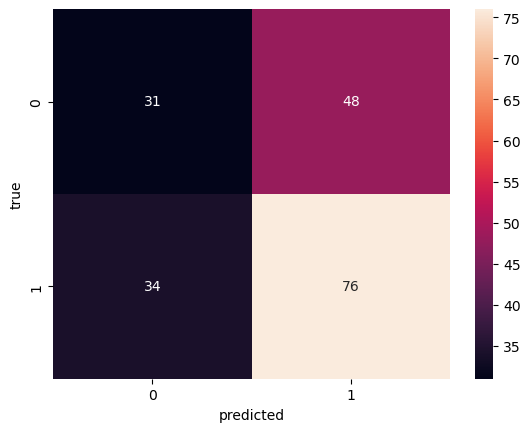

In [329]:
sns.heatmap(data=confusion_matrix(y_test,log_predictions),annot=True);
plt.xlabel("predicted");
plt.ylabel("true");

### Нахождение подходящего порога

Так как заказчику важно, чтобы молоко было вкусным - модель должна минимизировать количество False Positive, то есть повысить precision. Повысим порог для увелечения precision и уменьшения recall.

In [333]:
thresholds = [round(i,2) for i in np.linspace(0.5,1,num = 20,endpoint=False)]

In [335]:
y_proba = log_model.predict_proba(X_test)[:, 1]
for threshold in thresholds:
    y_pred_custom = (y_proba >= threshold).astype(int)
    calculate_metrics_log(y_test,y_pred_custom,threshold)

Метрики для модели логистической регрессии с порогом 0.5:
accuracy = 0.5661375661375662
recall = 0.6909090909090909
precision = 0.6129032258064516 

Метрики для модели логистической регрессии с порогом 0.52:
accuracy = 0.5661375661375662
recall = 0.6818181818181818
precision = 0.6147540983606558 

Метрики для модели логистической регрессии с порогом 0.55:
accuracy = 0.5396825396825397
recall = 0.6272727272727273
precision = 0.6 

Метрики для модели логистической регрессии с порогом 0.57:
accuracy = 0.5291005291005291
recall = 0.5909090909090909
precision = 0.5963302752293578 

Метрики для модели логистической регрессии с порогом 0.6:
accuracy = 0.5608465608465608
recall = 0.5727272727272728
precision = 0.6363636363636364 

Метрики для модели логистической регрессии с порогом 0.62:
accuracy = 0.5555555555555556
recall = 0.5363636363636364
precision = 0.6413043478260869 

Метрики для модели логистической регрессии с порогом 0.65:
accuracy = 0.5608465608465608
recall = 0.5
precision = 0.6

C:\Users\Player\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Player\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [337]:
y_proba = log_model.predict_proba(X_test)[:, 1]

threshold = 0.6
y_pred_custom = (y_proba >= threshold).astype(int)

In [339]:
calculate_metrics_log(y_test,y_pred_custom,threshold)

Метрики для модели логистической регрессии с порогом 0.6:
accuracy = 0.5608465608465608
recall = 0.5727272727272728
precision = 0.6363636363636364 



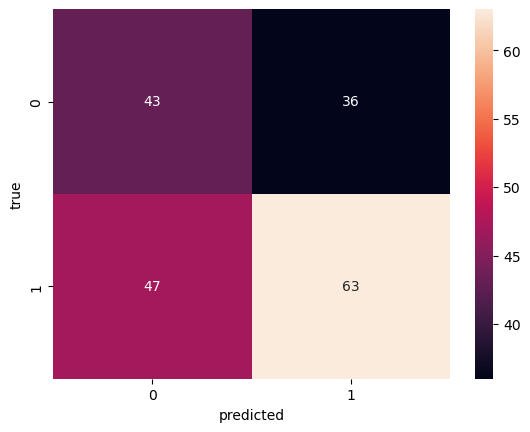

In [341]:
sns.heatmap(data=confusion_matrix(y_test,y_pred_custom),annot=True);
plt.xlabel("predicted");
plt.ylabel("true");

Порог был повышен до 0.6, так как при этом значени - значение accuracy почти не изменилось, precision увеличился, recall уменьшился.

### Прогнозирование

In [349]:
X_test_ohe = encoder.transform(cow_buy[cat_col_names])
    
encoder_col_names = encoder.get_feature_names_out()
    
X_test_scaled = scaler.transform(cow_buy[num_col_names])
    
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_cow_buy_log = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [351]:
y_proba = log_model.predict_proba(X_cow_buy_log)[:, 1]

threshold = 0.6
final_log_predictions = (y_proba >= threshold).astype(int)

In [353]:
final_log_predictions

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0])

In [355]:
np.array(['вкусно' if x==1 else 'не вкусно' for x in final_log_predictions])

array(['вкусно', 'вкусно', 'вкусно', 'не вкусно', 'не вкусно',
       'не вкусно', 'вкусно', 'вкусно', 'не вкусно', 'не вкусно',
       'не вкусно', 'вкусно', 'не вкусно', 'вкусно', 'не вкусно',
       'не вкусно'], dtype='<U9')

In [357]:
cow_buy['milk_taste_predicted'] = np.array(['вкусно' if x==1 else 'не вкусно' for x in final_log_predictions]) 
#добавляем в датафрейм столбец с предсказаниями

### Вывод
Для прогноза вкуса молока была создана модель логистической регрессии. Чтобы повысить метрику precision, был измененено значения порога на 0.6. Итоговые значения метрик:
- accuracy = 0.56
- recall = 0.57
- precision = 0.64

Качество модели неудовлетворительно, скорее всего нужны дополнительные признаки, текущие слабо коррелируют с целевым признаком. Так же результаты могут быть связаны с тем, что целевой признак является субъективным мнением фермера, из-за этого его сложно предсказать. Возможно стоит ввести признак, более объективно оценивающий вкус молока.

В таблицу cow_buy был добавлен столбец с предсказаниями вкуса milk_taste_predicted.

## Итоговые выводы

Выделим коров с удоем более 6 тысяч кг, и с вкусным молоком.

In [362]:
predicted_data = cow_buy.query("predicted_milk_yield_kg>6000 and milk_taste_predicted=='вкусно'")

In [364]:
predicted_data

breed pasture_type father_breed father_name  fat_percent  \
0    Вис Бик Айдиал    Холмистое       Айдиал    Геркулес         3.58   
1    Вис Бик Айдиал    Равнинное      Соверин      Буйный         3.54   
2   РефлешнСоверинг    Равнинное      Соверин       Барин         3.59   
7    Вис Бик Айдиал    Равнинное      Соверин      Буйный         3.57   
9   РефлешнСоверинг    Холмистое       Айдиал      Буйный         3.40   
13   Вис Бик Айдиал    Холмистое      Соверин       Барин         3.42   
16   Вис Бик Айдиал    Холмистое      Соверин    Соловчик         3.73   

    protein_percent          age  energy_feed_unit  raw_protein_g  \
0             3.076  более_2_лет         15.276162    2019.947532   
1             3.081  менее_2_лет         15.276162    2019.947532   
2             3.074  более_2_лет         15.276162    2019.947532   
7             3.079  более_2_лет         15.276162    2019.947532   
9             3.079  менее_2_лет         15.276162    2019.947532   
13            3.075  менее_2_лет         15.276162    2019.947532   
16            3.079  более_2_лет         15.276162    2019.947532   

    sugar_protein_ratio  energy_feed_unit_sqr spr_is  predicted_milk_yield_kg  \
0              0.958744            233.361138   high              6520.059360   
1              0.958744            233.361138   high              6283.550978   
2              0.958744            233.361138   high              6315.152004   
7              0.958744            233.361138   high              6514.714500   
9              0.958744            233.361138   high              6278.778352   
13             0.958744            233.361138   high              6061.203540   
16             0.958744            233.361138   high              6362.834109   

   milk_taste_predicted  
0                вкусно  
1                вкусно  
2                вкусно  
7                вкусно  
9                вкусно  
13               вкусно  
16               вкусно

Был проведен анализ и прогнозирование данных для  принятия решений о покупке бурёнок для молочного хозяйства «Вольный луг», в ходе иследования было использовано 3 датасета, содержащие информаицю о коровах и их особенностях. 

Изначальный размер датасетов: farm_main (634 x 12), cow_buy (20 x 7), farm_dad (629 x 2). В ходе преобработки:  

- Изменены типы данных в таблицах farm_main, cow_buy. Тип object изменен на float64 в соответствующих колонках;
- В таблицах farm_main и cow_buy удалено 5 и 4 строк дубликат соотвественно;
- В таблицах farm_main и cow_buy стандартизированы названия категорий pasture_type и father_breed;
- Пропусков обнаружено не было.

Результаты исследовательского анализа: 

- В таблице farm_main 
 - Были найдены и удалены аномалии в признаке milk_yield_kg.
 - В fat_percent и protein_percent так же были обнаружены выбросы, но они были оставлены, в связи с тем, что признак выражен в процентах.
 - Коров менее 2 лет мало в таблице, менее 150.
 
Выделенные зависимости:

- между целевым признаком milk_yield_kg и energy_feed_unit, sugar_protein_ratio наблюдается высокая корреляция и нелинейные связи.
- у графика sugar_protein_ratio наблюдения сгруппированы в два кластера, у графика energy_feed_unit распределение более равномерное без выраженных скоплений.
- средняя зависимость с fat_percent и слабая с raw_protein_g, с protein_percent корреляции почти нет.
- между двумя входными признаками, которые сильнее всех коррелируют с целевой переменной, наблюдается высокая взаимная корреляция. Это указывает на наличие мультиколлинеарности между признаками.
- между признаком father_breed и целевым есть зависимость, удоя больше у породы Айдиал.
- очень заметная зависимость между признаком age и целевым, удоя больше у коров старше 2 лет.
- РефлешнСоверинг имеет большее СПО (>0.92)
- РефлешнСоверинг имеет больший процент жира(>3.6)
- Айдиал имеет больший процент белка(>3.078)

Была создана модель линейной регрессии для предсказания удоя. Для того улучшения модели:

- количественные признаки были масштабированы, категориальные признаки закодированы
- были устранены нелинейные зависимости (добавлены столбцы energy_feed_unit_sqr и spr_is)
- был добавлен столбец father_name из таблицы farm_dad
- некоррелирующие данные не были взяты за входные 

Результаты модели:

- R^2 = 0.83
- MSE = 40275
- MAE = 161
- RMSE = 201
- гистограмма распределения остатков имеет асимметричное нормальное распределение со смещением влево, что говорит о перепрогнозировании, прогнозы больше, чем реальные значения.
- анализ дисперсии показывает, что при большем значении предсказаний появляются большие остатки

Была создана модель логистической регрессии для предсказания вкуса молока. В связи с высокой важностью приобретения коров с  вкусным молоком, при выборе модели был сделан акцент на метрику precision. Чтобы ее повысить, было измененено значения порога на 0.6. Итоговые значения метрик:

- accuracy = 0.56
- recall = 0.57
- precision = 0.64

По результатам прогнозирования было выделено 7 коров, они хранятся в датасете predicted_data. Среди них большинство коров породы Вис Бик Айдиал с породой отца Соверин. 

Рекомендации для улучшения прогнозов:

 - Линейная регрессия. Из-за того, что изначально в cow_buy не было столбцов ЭКЕ, Сырой протеин и СПО, их пришлось считать вручную с помощью увелечиния на 5% среднего значения данных признаков из таблицы farm_main. Это плохо повлияло на итоговые предсказания, для улучшения работы модели линейной регрессии нужны эти данные отдельно для каждой коровы, так как они больше всего коррелируют с целевой переменной.

- Логистическая регрессия. Качество модели неудовлетворительно, текущие признаки слабо коррелируют с целевым признаком. Результаты могут быть связаны с тем, что целевой признак является субъективным мнением фермера, из-за этого его сложно предсказать. Возможно стоит ввести признак, более объективно оценивающий вкус молока.
